In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# import constraint Learning Tool 
import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), 'DistCL_code'))
from distcl import distcl

In [5]:
data = pd.read_csv("data/two_windturbine.csv")
data.head()

,x_turb2,y_turb2,wind_speed,wind_direction,turbulence_intensity,turbine1_power,turbine2_powers,farm_power
0,800,0,8.0,270.0,0.06,1753.954459,615.070589,2369.025048
1,800,200,8.0,270.0,0.06,1753.954459,1751.593411,3505.547870
2,800,400,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
3,800,600,8.0,270.0,0.06,1753.954459,1753.954459,3507.908918
4,900,0,8.0,270.0,0.06,1753.954459,694.023084,2447.977544


In [6]:
### Test/Train Split
from sklearn.model_selection import train_test_split


# Split the data into training, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

val_ind = val_data.index
test_ind = test_data.index

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_hidden': [1, 2, 3, 4, 5, 6],
    'n_nodes': [10, 20, 30, 40, 50 ,60]
}

# Initialize variables to store the best parameters and the corresponding RMSE
best_params = None
best_rmse = float('inf')

grid_search = []

# Perform grid search
for n_hidden in param_grid['n_hidden']:
    for n_nodes in param_grid['n_nodes']:
        print("goooo")


        # Train the model with the current parameters
        cl_tool = distcl(X=data[["x_turb2", "y_turb2", "wind_speed", "wind_direction", "turbulence_intensity"]],
                         y=data["farm_power"], n_preds=n_nodes, val_ind=val_ind, test_ind=test_ind)
        
        model, preds_test, sd_test, y_test = cl_tool.train(n_hidden=n_hidden, n_nodes=n_nodes, iters=5000, drop=0.05, learning_rate=1e-4)
        
        # Calculate the RMSE
        rmse = np.sqrt(mean_squared_error(y_test, preds_test))

        # # Store the results
        grid_search.append({'n_hidden': n_hidden, 'n_nodes': n_nodes, 'rmse': rmse})

        # Update the best parameters if the current RMSE is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'n_hidden': n_hidden, 'n_nodes': n_nodes}


# Retrain the model with the best parameters
cl_tool = distcl(X=data[["x_turb2", "y_turb2", "wind_speed", "wind_direction", "turbulence_intensity"]],
            y=data["farm_power"], n_preds=best_params['n_nodes'], val_ind=val_ind, test_ind=test_ind)

model, preds_test, sd_test, y_test = cl_tool.train(n_hidden=best_params['n_hidden'], n_nodes=best_params['n_nodes'], iters=5000, drop=0.05, learning_rate=1e-4)

goooo
DistFCNN(
  (lin_layers): ModuleList(
    (0): Linear(in_features=5, out_features=10, bias=True)
  )
  (output_mean_layer): Linear(in_features=10, out_features=1, bias=True)
  (output_sd_layer): Linear(in_features=10, out_features=1, bias=True)
  (droput_layers): ModuleList(
    (0): Dropout(p=0.05, inplace=False)
  )
)
cpu
epoch 0 loss 1.1856555938720703
epoch 500 loss 1.0268126726150513
epoch 1000 loss 0.8570076823234558
epoch 1500 loss 0.80589359998703
epoch 2000 loss 0.7481546998023987
epoch 2500 loss 0.6693488955497742
epoch 3000 loss 0.5906098484992981
epoch 3500 loss 0.6053122878074646
epoch 4000 loss 0.6050719022750854
epoch 4500 loss 0.618539571762085
NN fitting process finished with a validation GAUSSIANNLL loss of 0.58414626121521 in epoch 2952
goooo
DistFCNN(
  (lin_layers): ModuleList(
    (0): Linear(in_features=5, out_features=20, bias=True)
  )
  (output_mean_layer): Linear(in_features=20, out_features=1, bias=True)
  (output_sd_layer): Linear(in_features=20, out_

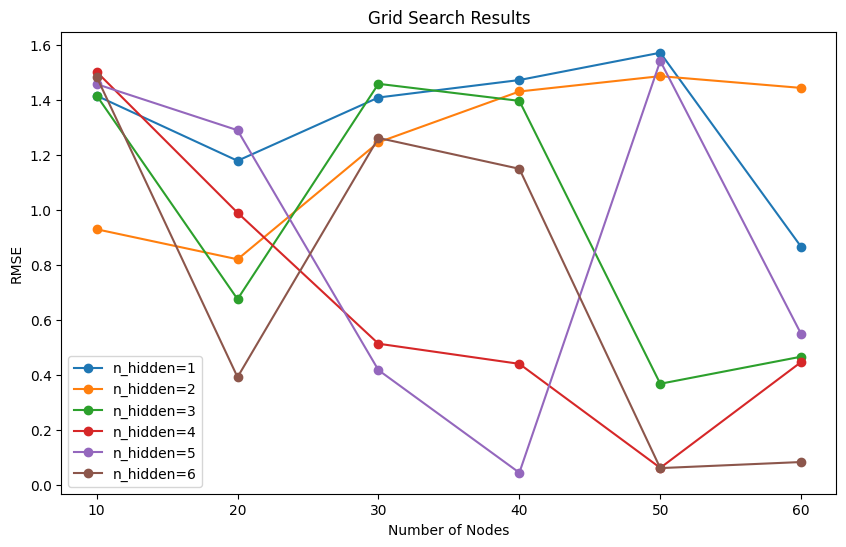

In [10]:
# Convert grid_search to a DataFrame for easier plotting
grid_search_df = pd.DataFrame(grid_search)

# Plot the grid search results
plt.figure(figsize=(10, 6))
for n_hidden in grid_search_df['n_hidden'].unique():
    subset = grid_search_df[grid_search_df['n_hidden'] == n_hidden]
    plt.plot(subset['n_nodes'], subset['rmse'], marker='o', label=f'n_hidden={n_hidden}')

plt.xlabel('Number of Nodes')
plt.ylabel('RMSE')
plt.title('Grid Search Results')
plt.legend()
plt.show()

DistFCNN(
  (lin_layers): ModuleList(
    (0): Linear(in_features=5, out_features=40, bias=True)
    (1-4): 4 x Linear(in_features=40, out_features=40, bias=True)
  )
  (output_mean_layer): Linear(in_features=40, out_features=1, bias=True)
  (output_sd_layer): Linear(in_features=40, out_features=1, bias=True)
  (droput_layers): ModuleList(
    (0-4): 5 x Dropout(p=0.05, inplace=False)
  )
)
cpu
epoch 0 loss 271792.25
epoch 500 loss 16570.66015625
epoch 1000 loss 664.5679321289062
epoch 1500 loss 699.267822265625
epoch 2000 loss 344.8754577636719
epoch 2500 loss 447.0191955566406
epoch 3000 loss 392.718505859375
epoch 3500 loss 243.2452392578125
epoch 4000 loss 525.6220703125
epoch 4500 loss 548.5674438476562
NN fitting process finished with a validation GAUSSIANNLL loss of 150.1251983642578 in epoch 4306


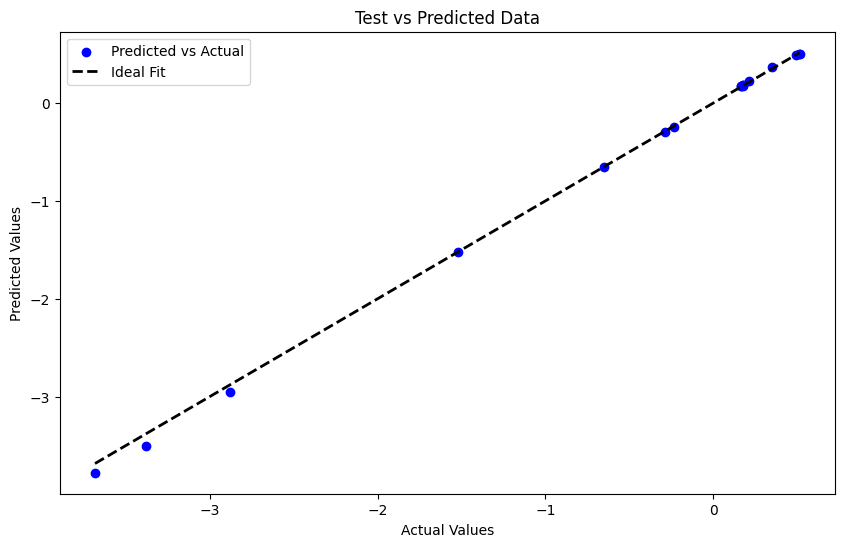

In [7]:
# Retrain the model with the best parameters
cl_tool = distcl(X=data[["x_turb2", "y_turb2", "wind_speed", "wind_direction", "turbulence_intensity"]],
            y=data["farm_power"], n_preds=1, val_ind=val_ind, test_ind=test_ind)

model, preds_test, sd_test, y_test = cl_tool.train(n_hidden=5, n_nodes=40, iters=5000, drop=0.05, learning_rate=1e-4)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds_test, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test vs Predicted Data')
plt.legend()
plt.show()

In [8]:
import pandas as pd
# Example new data for prediction
new_data = pd.DataFrame({
    "x_turb2": [1.5, 2.0],
    "y_turb2": [3.0, 4.0],
    "wind_speed": [5.5, 6.0],
    "wind_direction": [45, 90],
    "turbulence_intensity": [0.1, 0.2]
})

# Use the model to predict
new_preds, new_sd = model.predict(new_data)

# Display the predictions
print("Predictions:", new_preds)
print("Standard Deviations:", new_sd)

AttributeError: 'DistFCNN' object has no attribute 'predict'

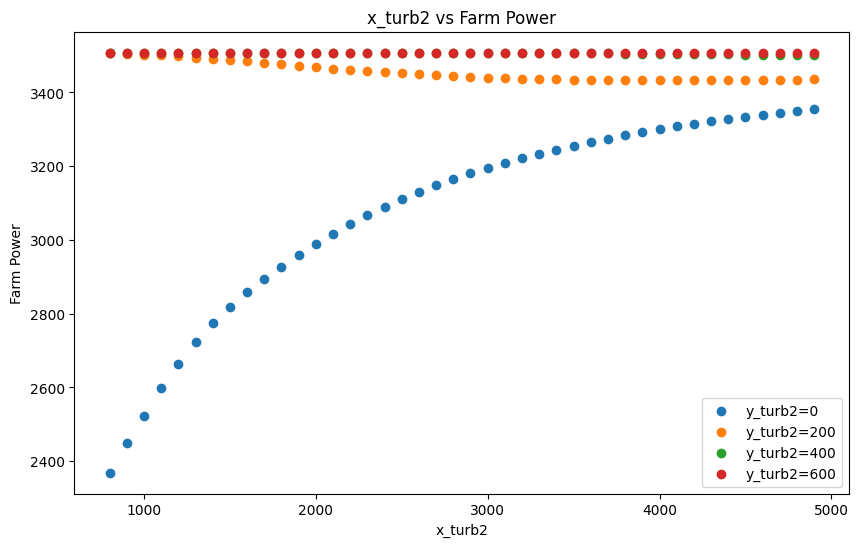

In [12]:
plt.figure(figsize=(10, 6))
categories = data['y_turb2'].unique()
for category in categories:
    subset = data[data['y_turb2'] == category]
    plt.scatter(subset['x_turb2'], subset['farm_power'], label=f'y_turb2={category}')

plt.xlabel('x_turb2')
plt.ylabel('Farm Power')
plt.title('x_turb2 vs Farm Power')
plt.legend()
plt.show()